In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output
import matplotlib.style as style
style.use('ggplot')

%matplotlib inline

In [5]:
# Load joined dataframe
df = pd.read_csv('csv/metadata_text_merged_cleaned.csv')
# Remove rows with empty text column for now
df = df.dropna(subset=['text'])

# Search and Visualization of Term Occurrences:
This tool enables you to visualize changes in the frequency of term occurrences in this corpus over space and time.

Usage: Modify what's within the brackets next to the variable named "terms" below. Click on the cell below and press Shift + Return in order to run the cell (alternatively, click on the cell below and select Select Cell -> Run Cells in the menu above).

('Filtering for term:', ['kettles'], '(14 total letters)')
First 5 rows of filtered dataframe:


,UID,Vol,LetterNo,Sender,Place Sent From,Ship Name,Place Going To,Date,Boat/Fort,RAC/Other Nation,text,Year,Month,text_cleaned,text_cleaned_dealiased,filtered
33,34,1,34,James Nightingale,Komenda,NaN,Cape Coast Castle,12,Fort,RAC,Your Honors much esteemed dated the 10th I hav...,1681.0,11.0,honors much esteemed dated 10th received also ...,honors much esteemed dated 10th received also ...,True
34,35,1,35,James Nightingale,Komenda,NaN,Cape Coast Castle,16,Fort,RAC,Your Honours of the 14th instant came safe to ...,1681.0,11.0,honours 14th instant came safe hands also 40 i...,honours 14th instant came safe hands also 40 i...,True
38,39,1,39,James Nightingale,Komenda,NaN,Cape Coast Castle,29,Fort,RAC,Your Worships of the 28th instant with halfe a...,1681.0,11.0,worships 28th instant halfe peece red cloath w...,worships 28th instant half peece red cloath we...,True
49,50,1,50,James Nightingale,Komenda,NaN,Cape Coast Castle,28,Fort,RAC,"According to order, I sent your honour 19 bras...",1681.0,12.0,according order sent honour 19 brass kettles o...,according order sent honour 19 brass kettles o...,True
145,146,1,146,Arthur Richards,Anashan,NaN,Cape Coast Castle,07,Fort,RAC,"Yours of this date I have received, and by the...",1681.0,9.0,date received 5 hand canoe 20 herba longees 40...,date received 5 hand canoe 20 herba longees 40...,True


UIDs of letters containing the term:
[  34   35   39   50  146  148  414  425  462  478  639 1699 2638 2975]


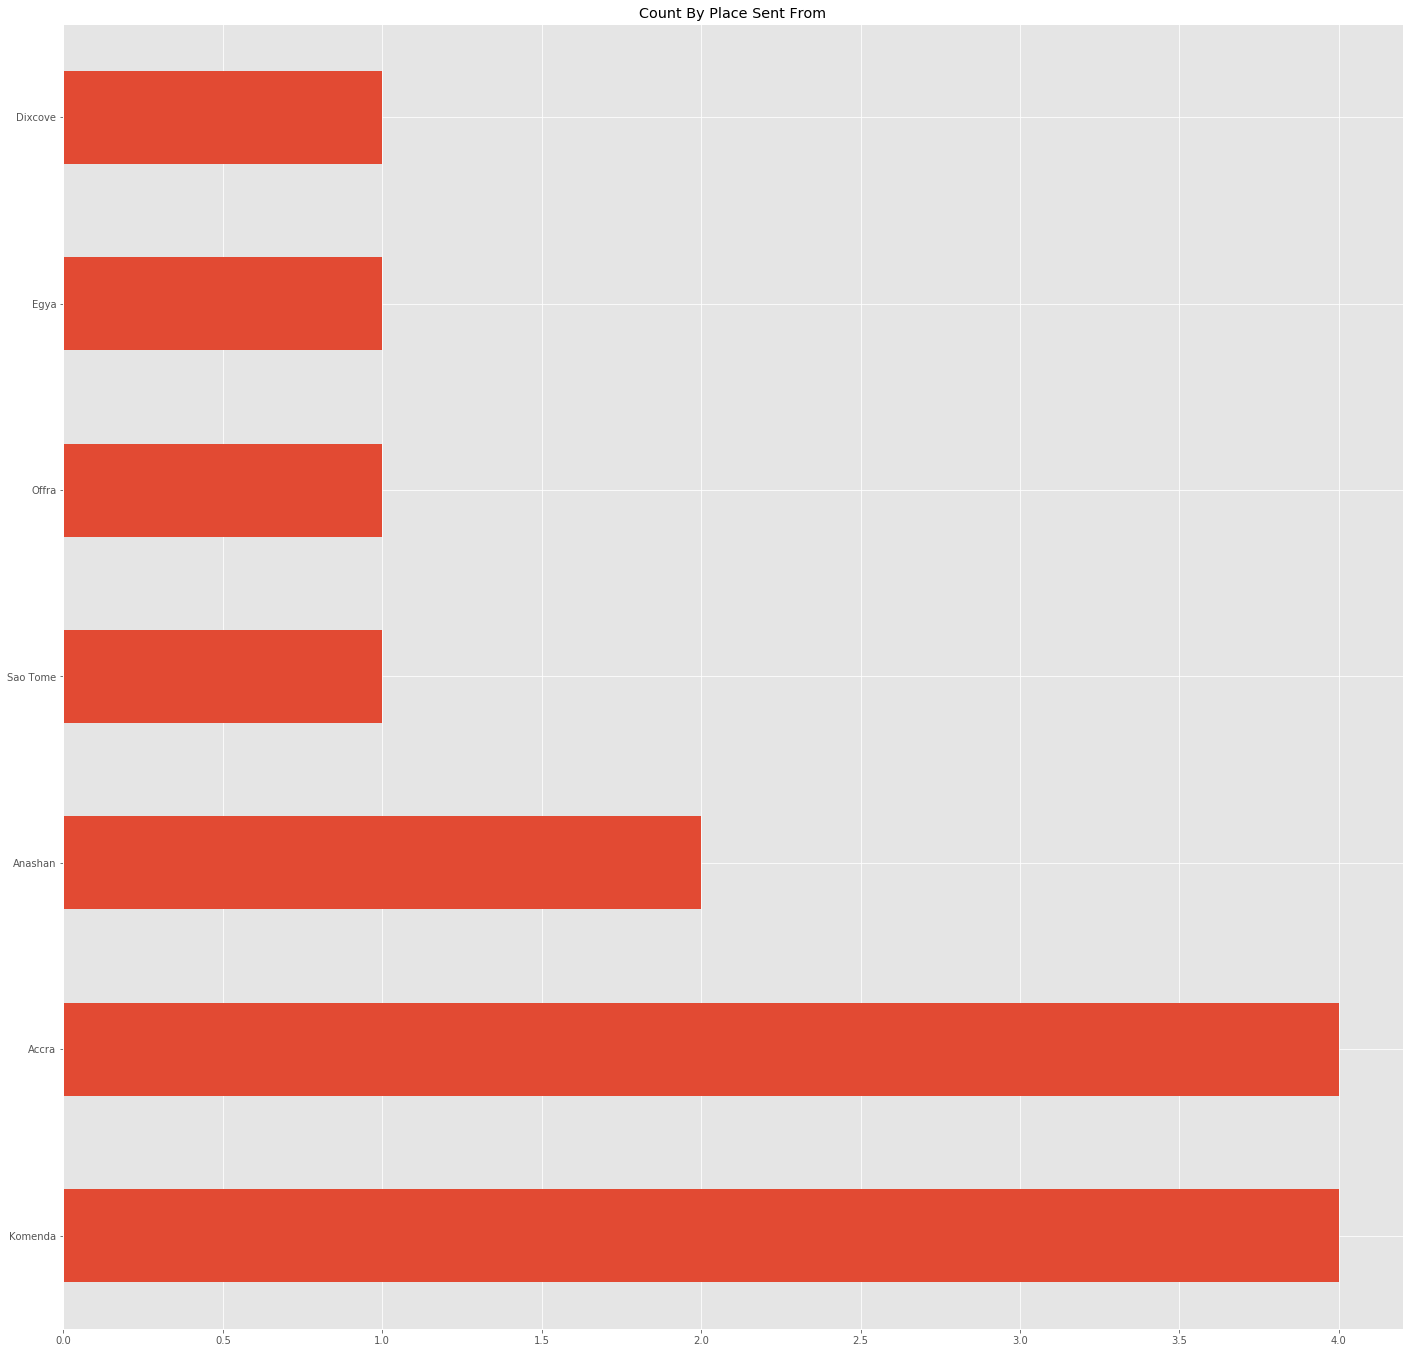

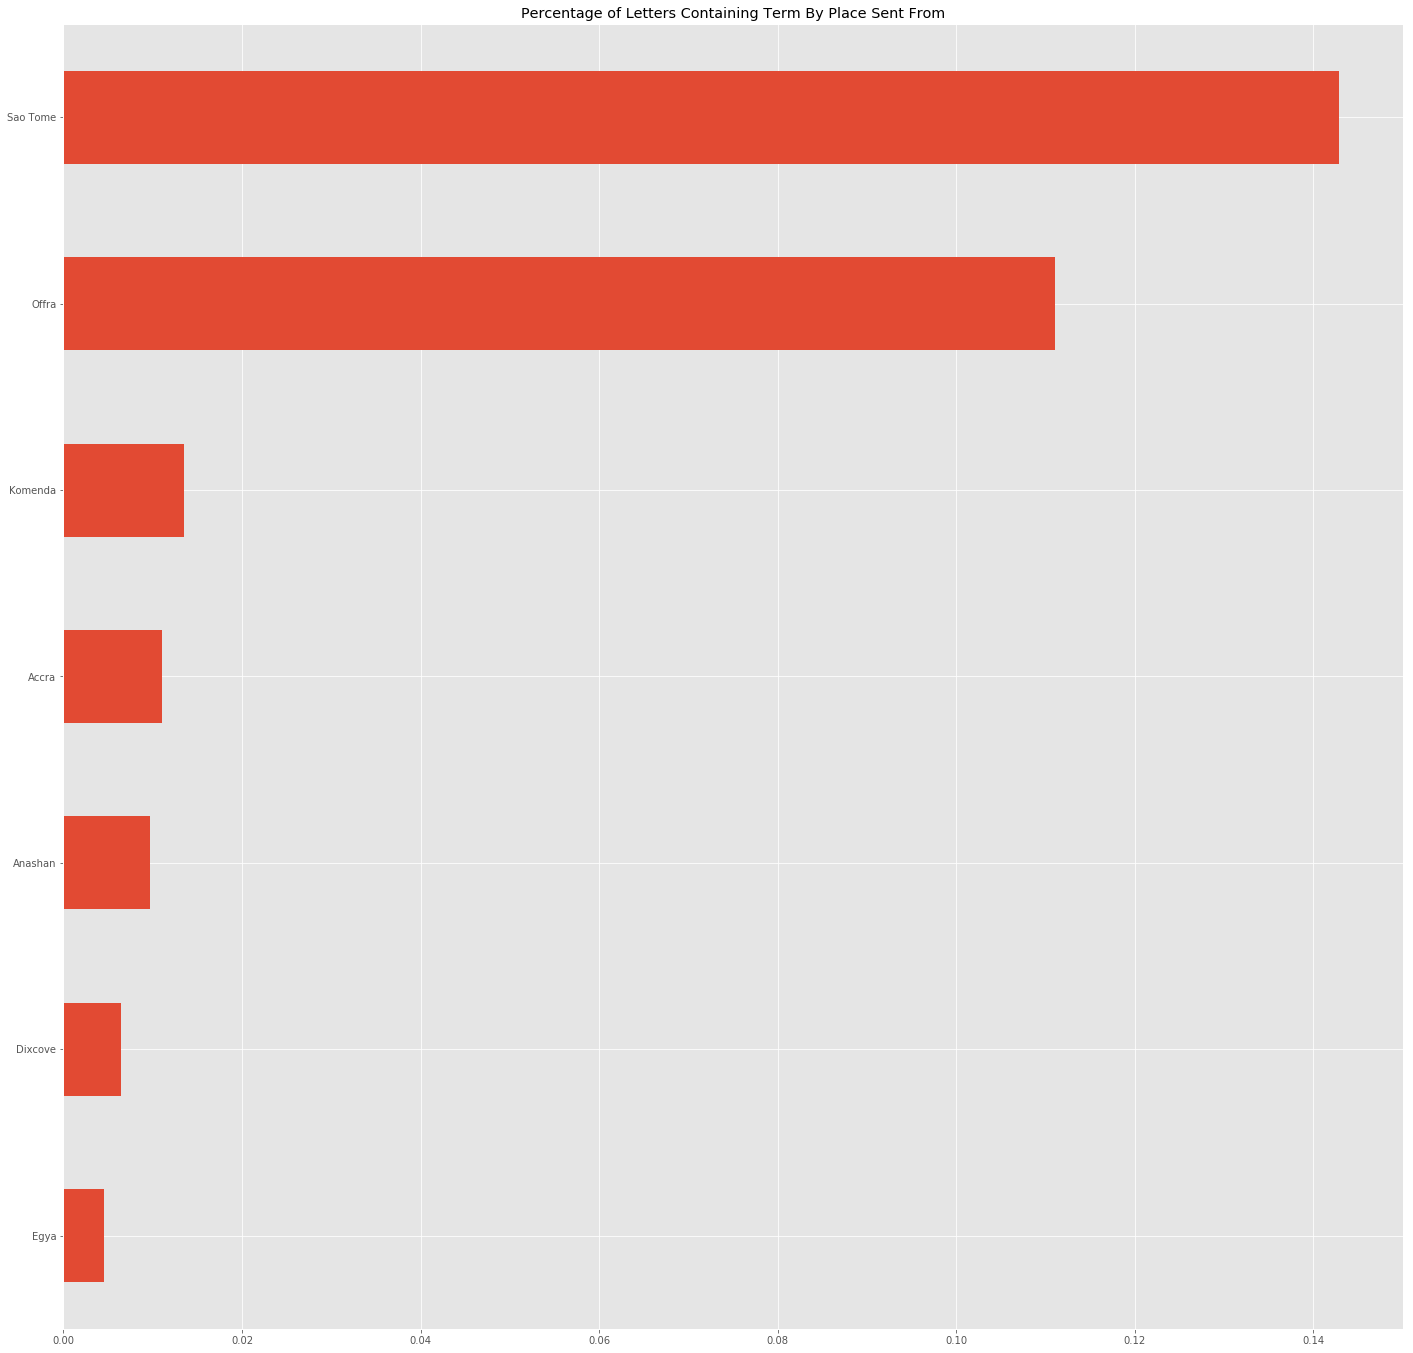

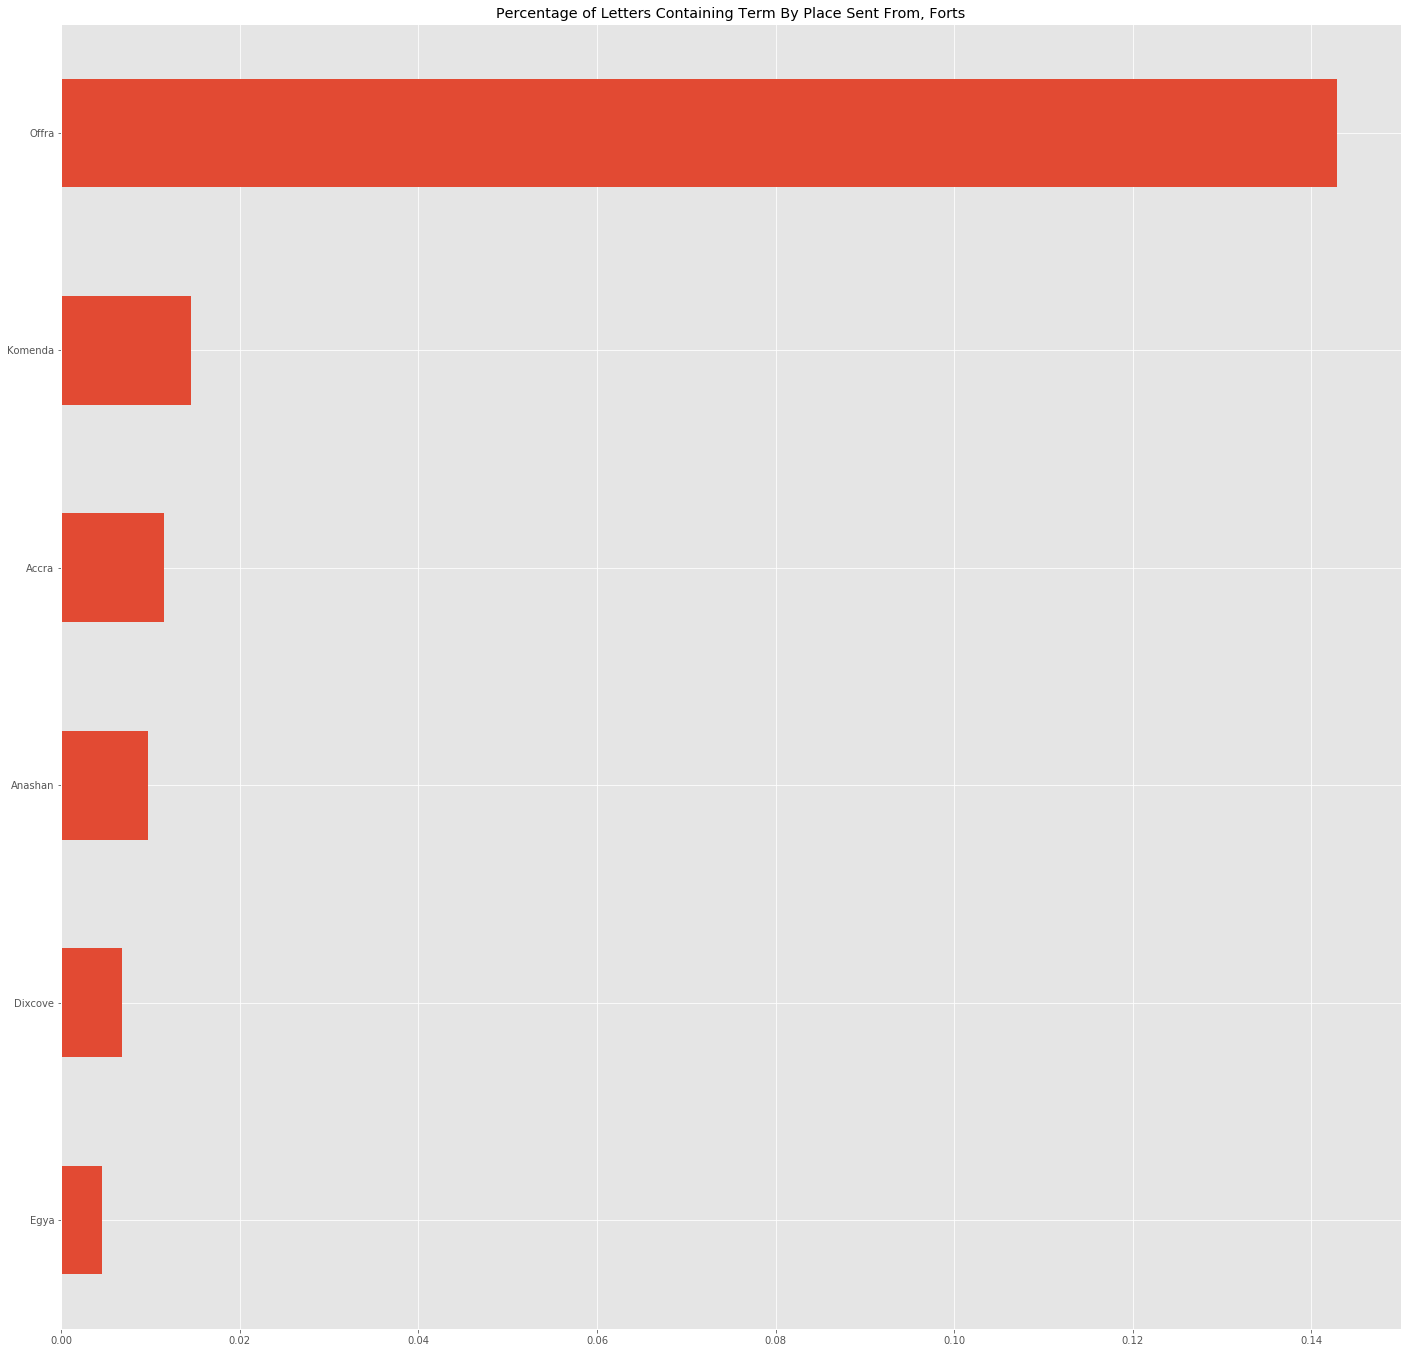

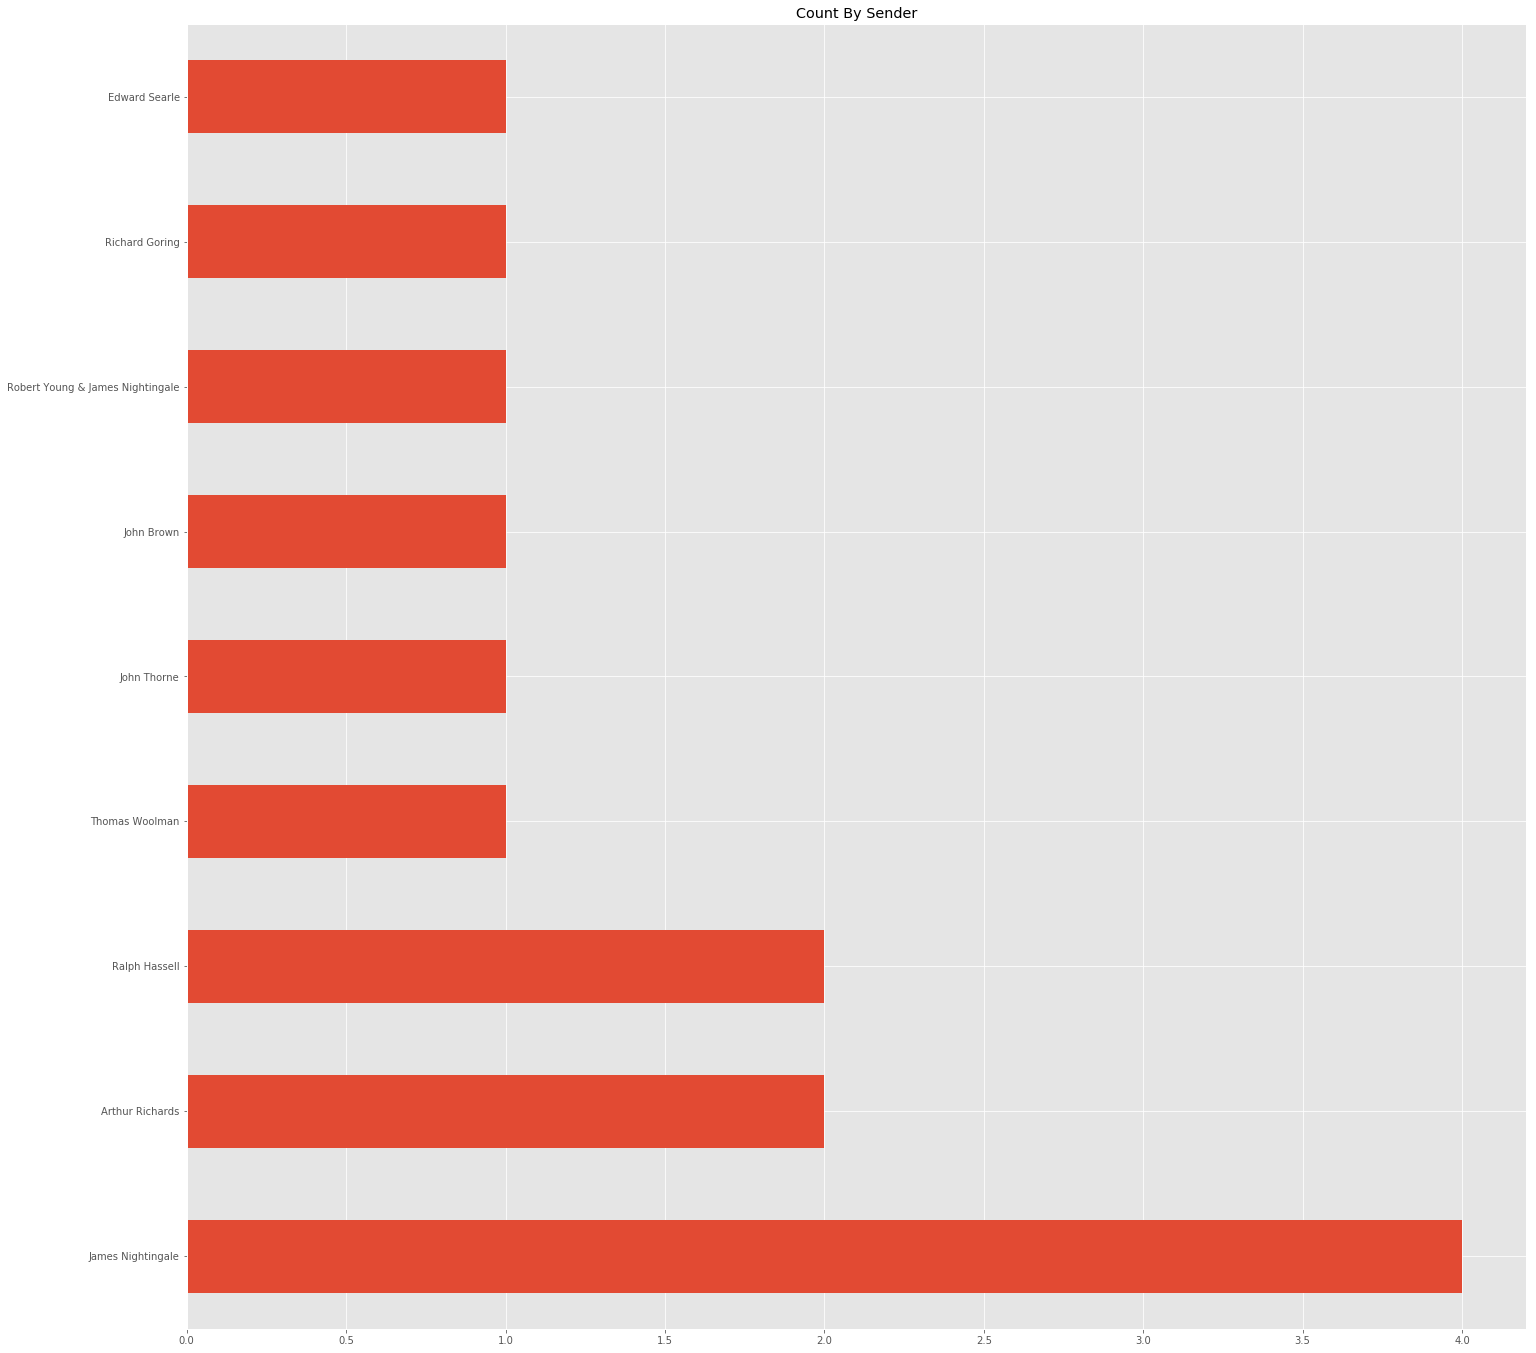

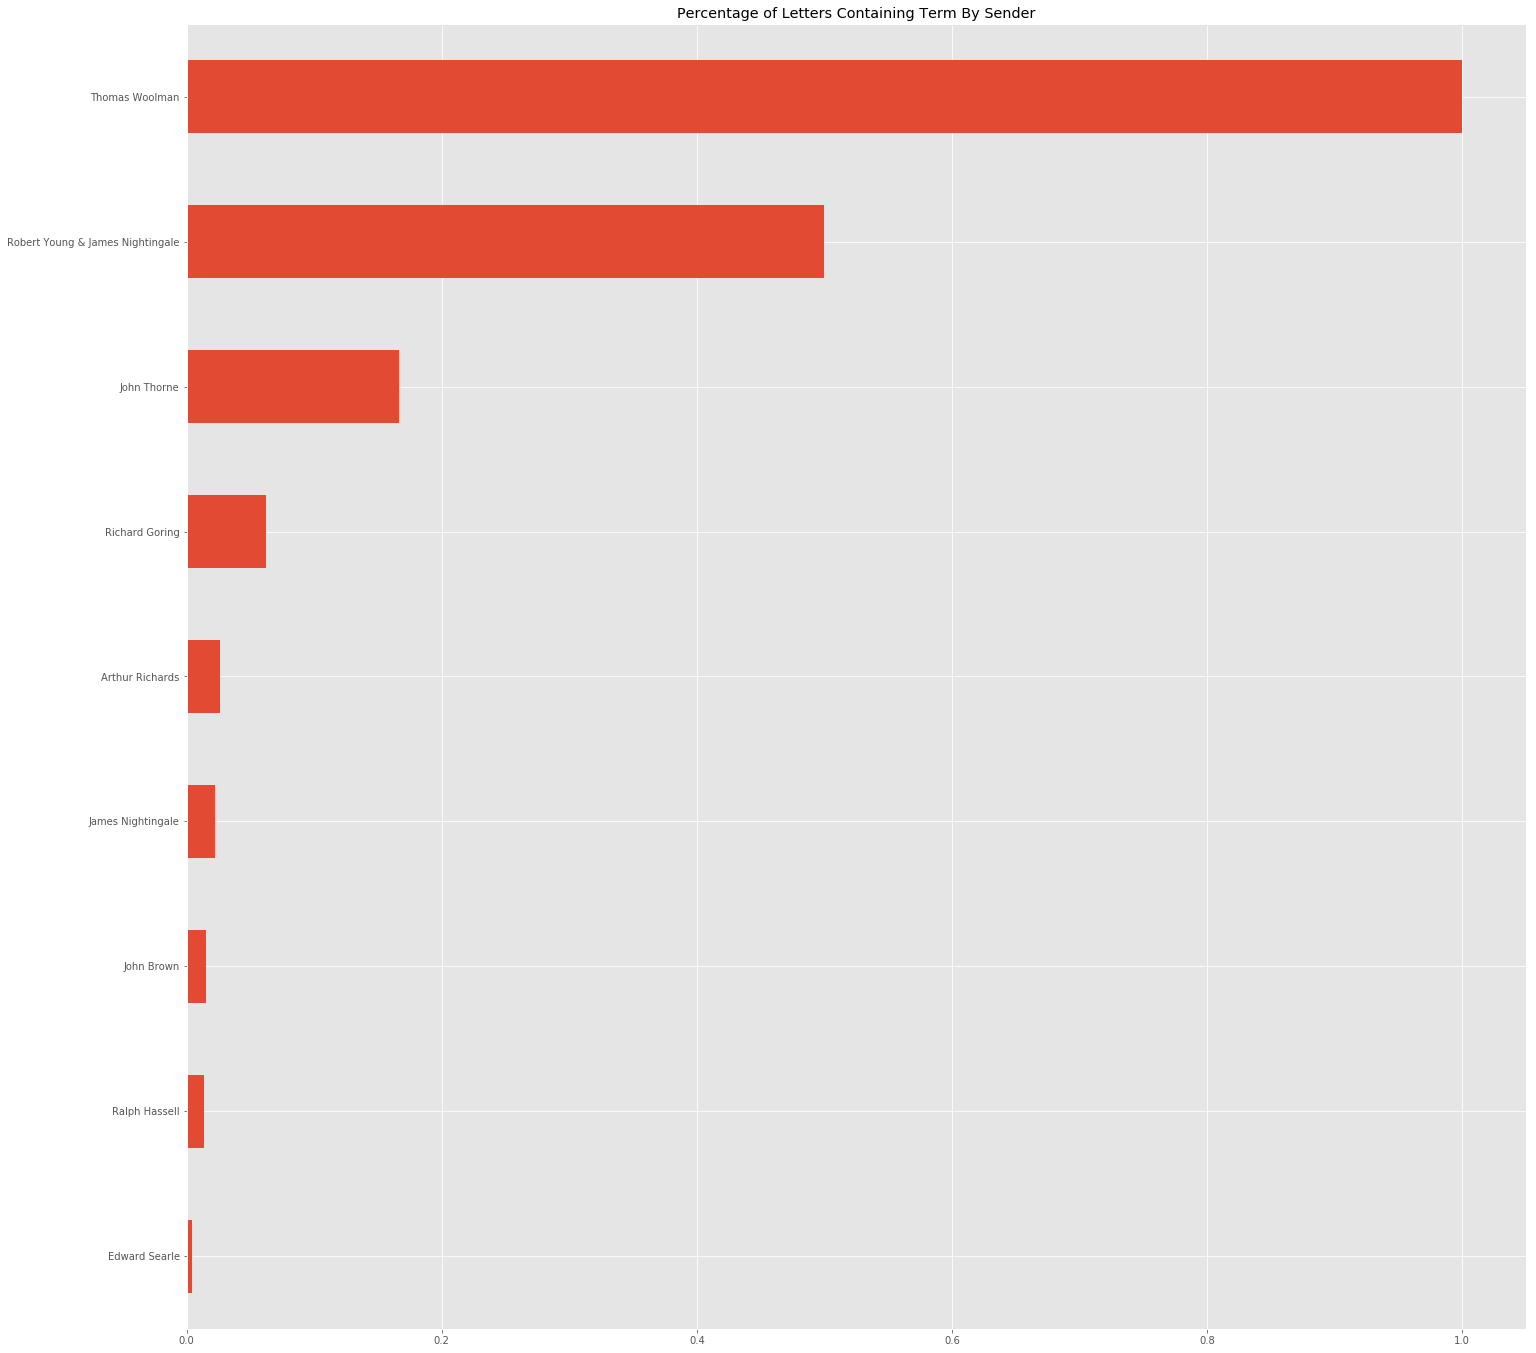

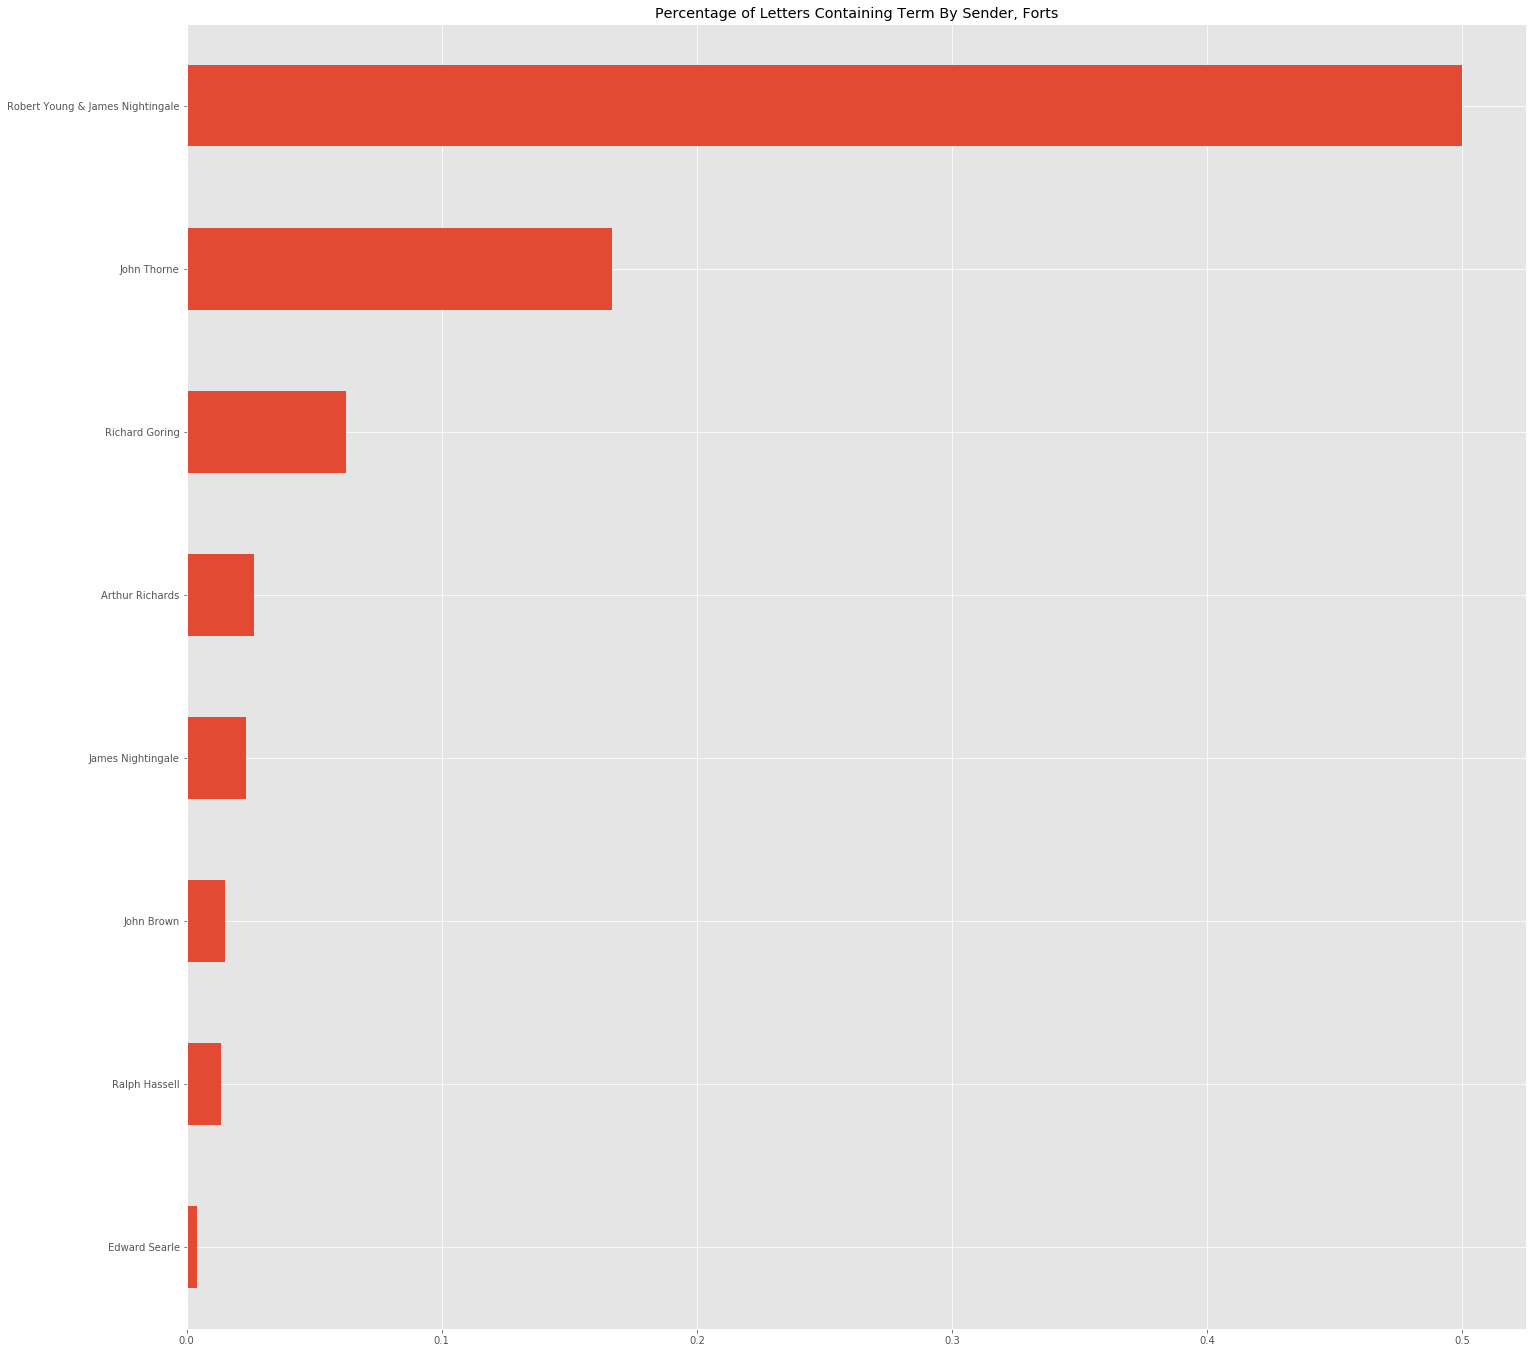

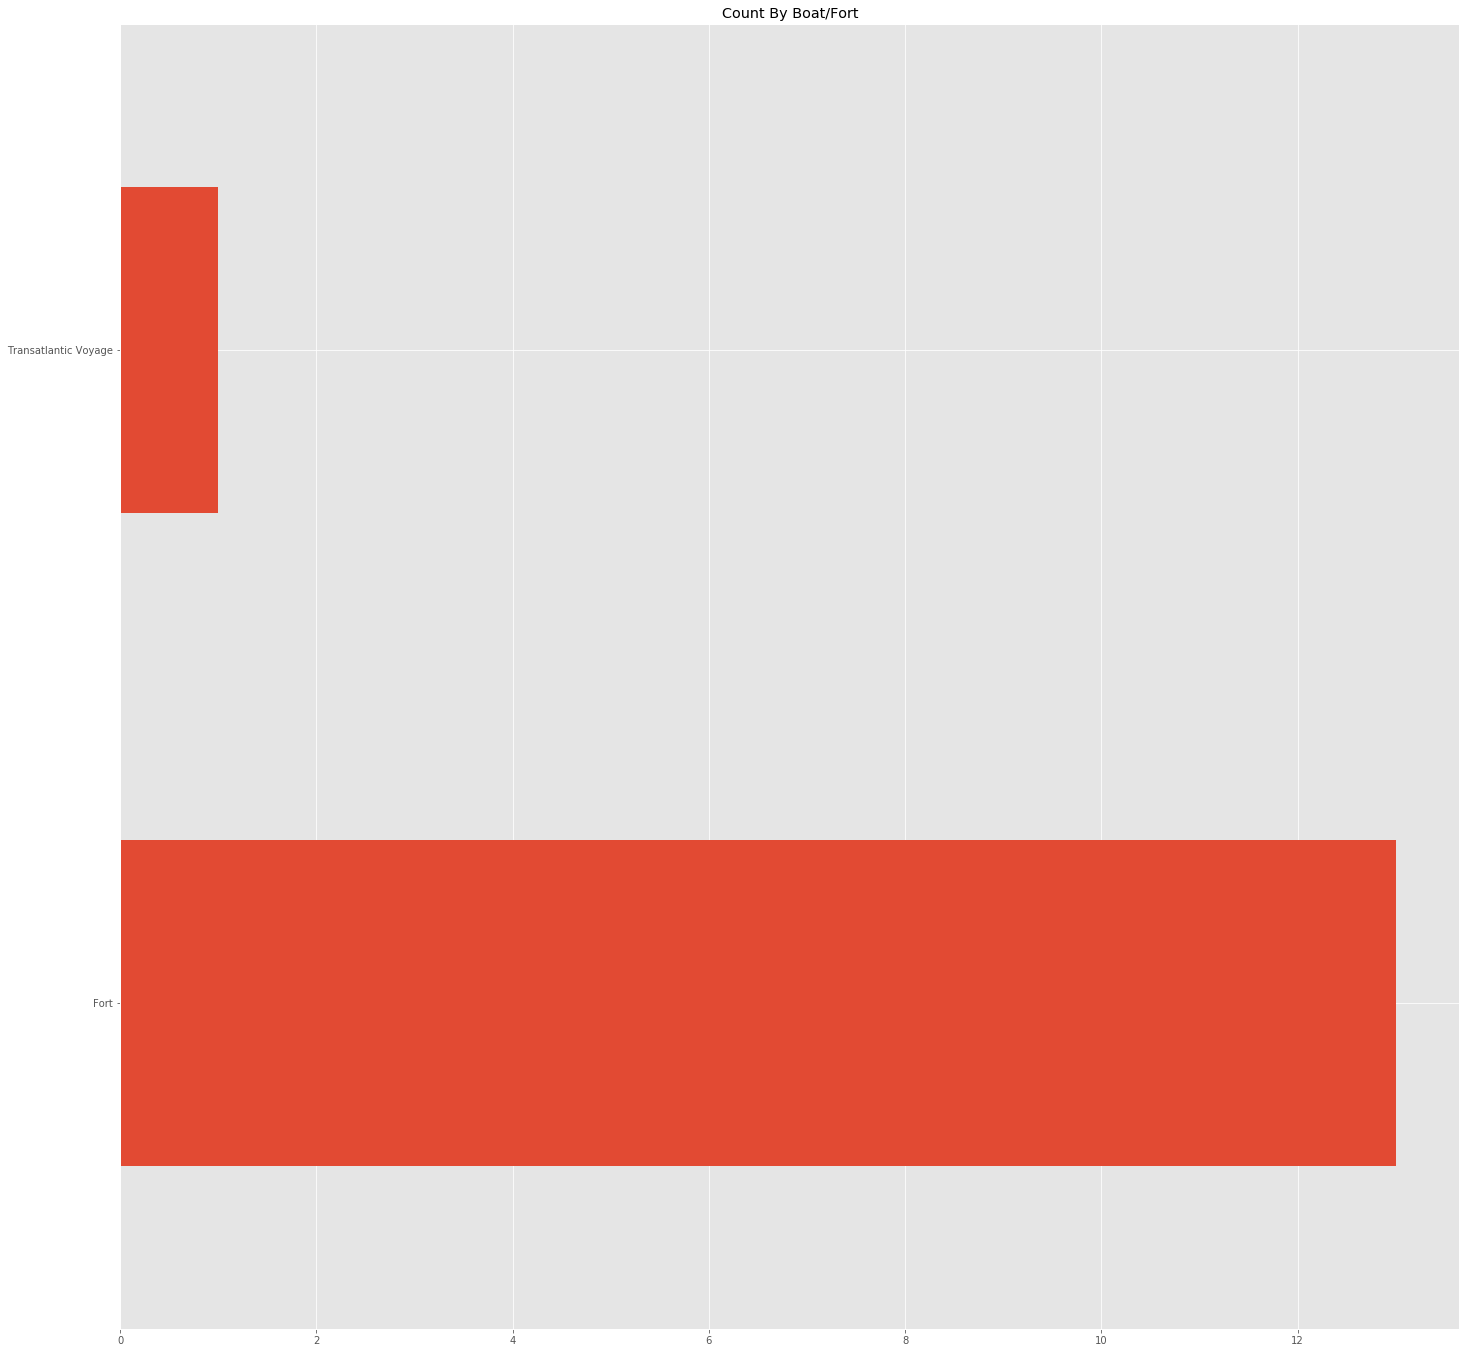

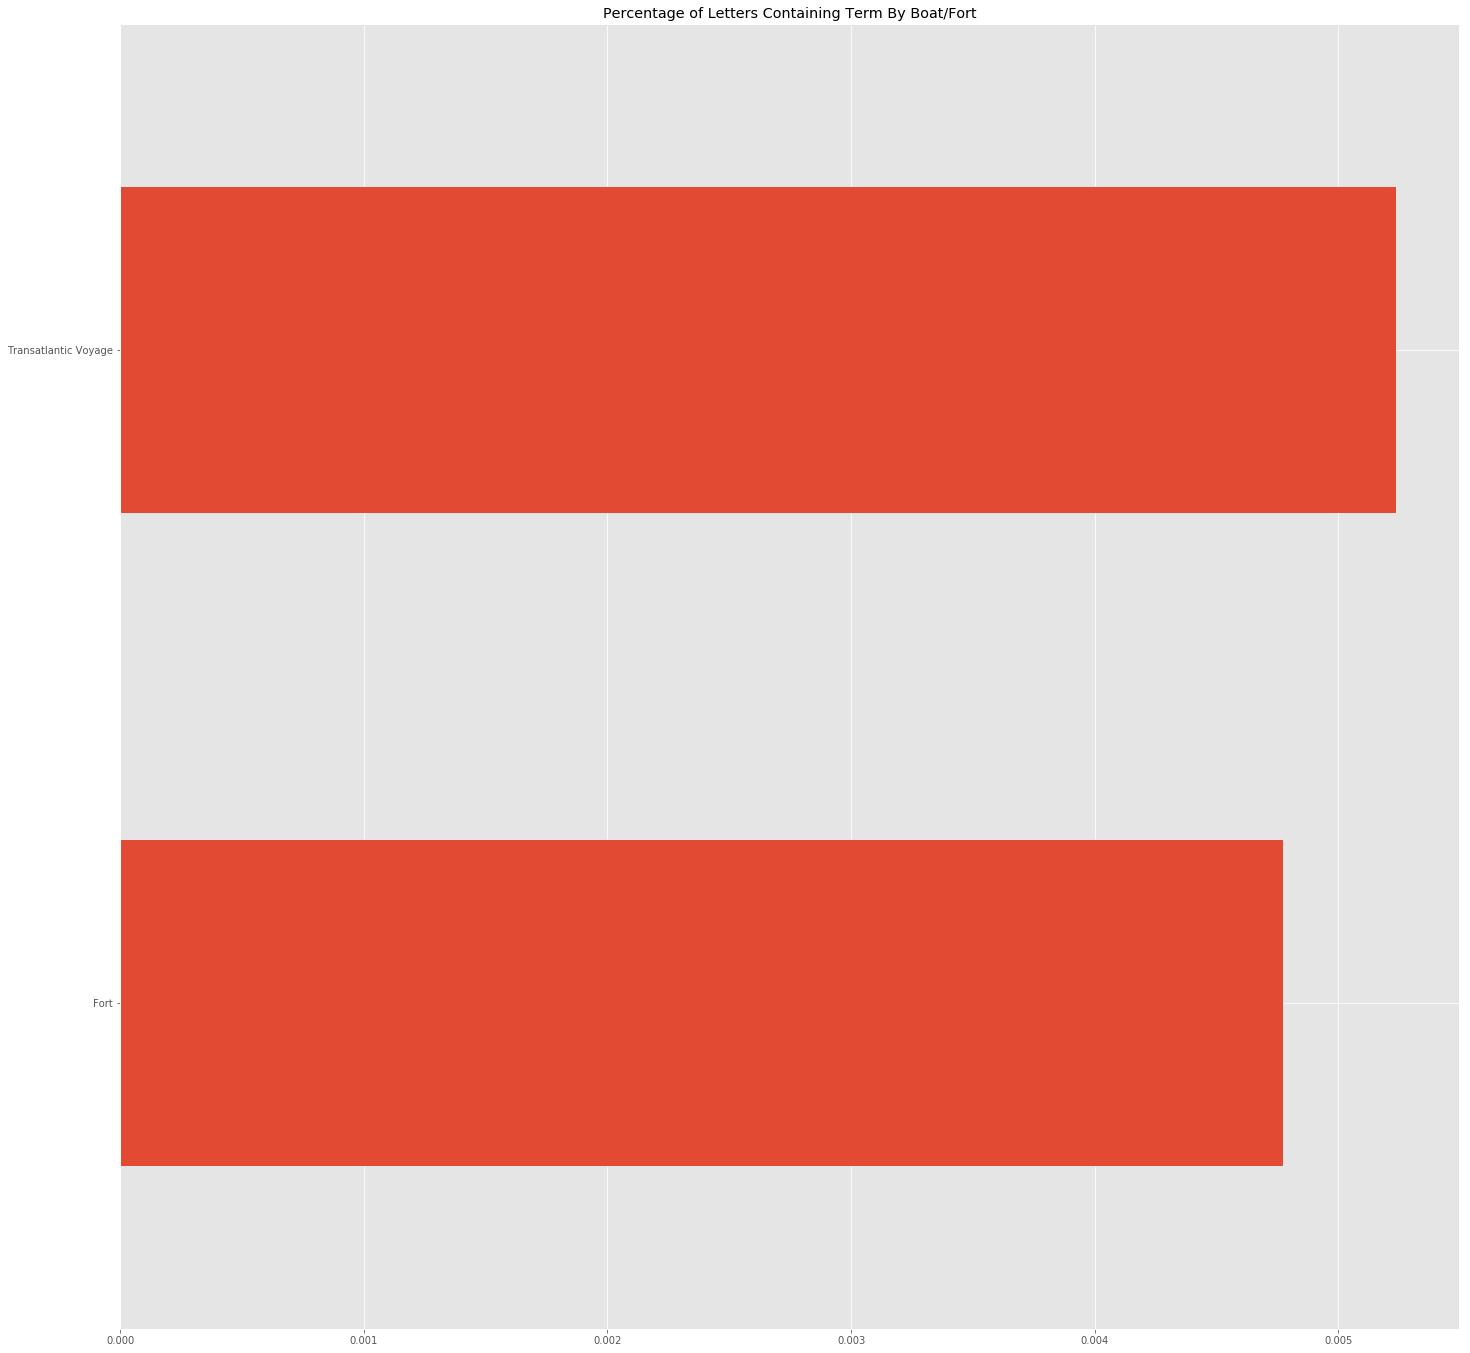

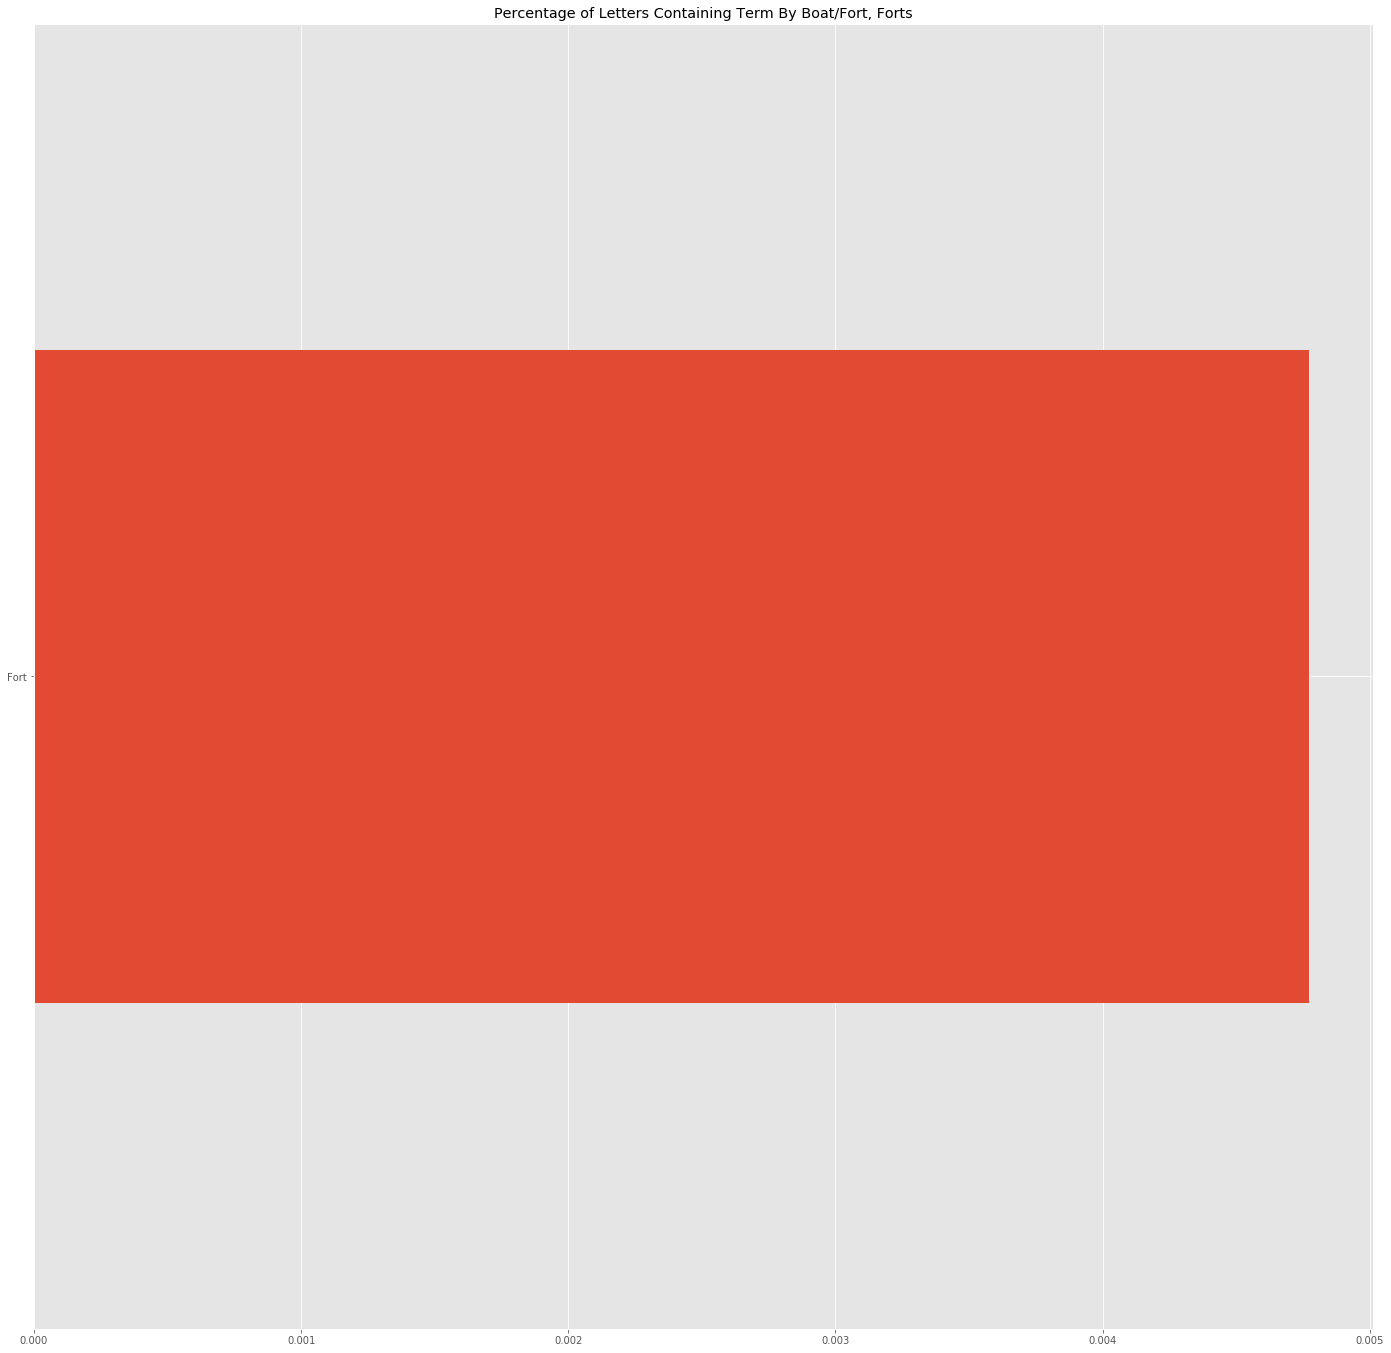

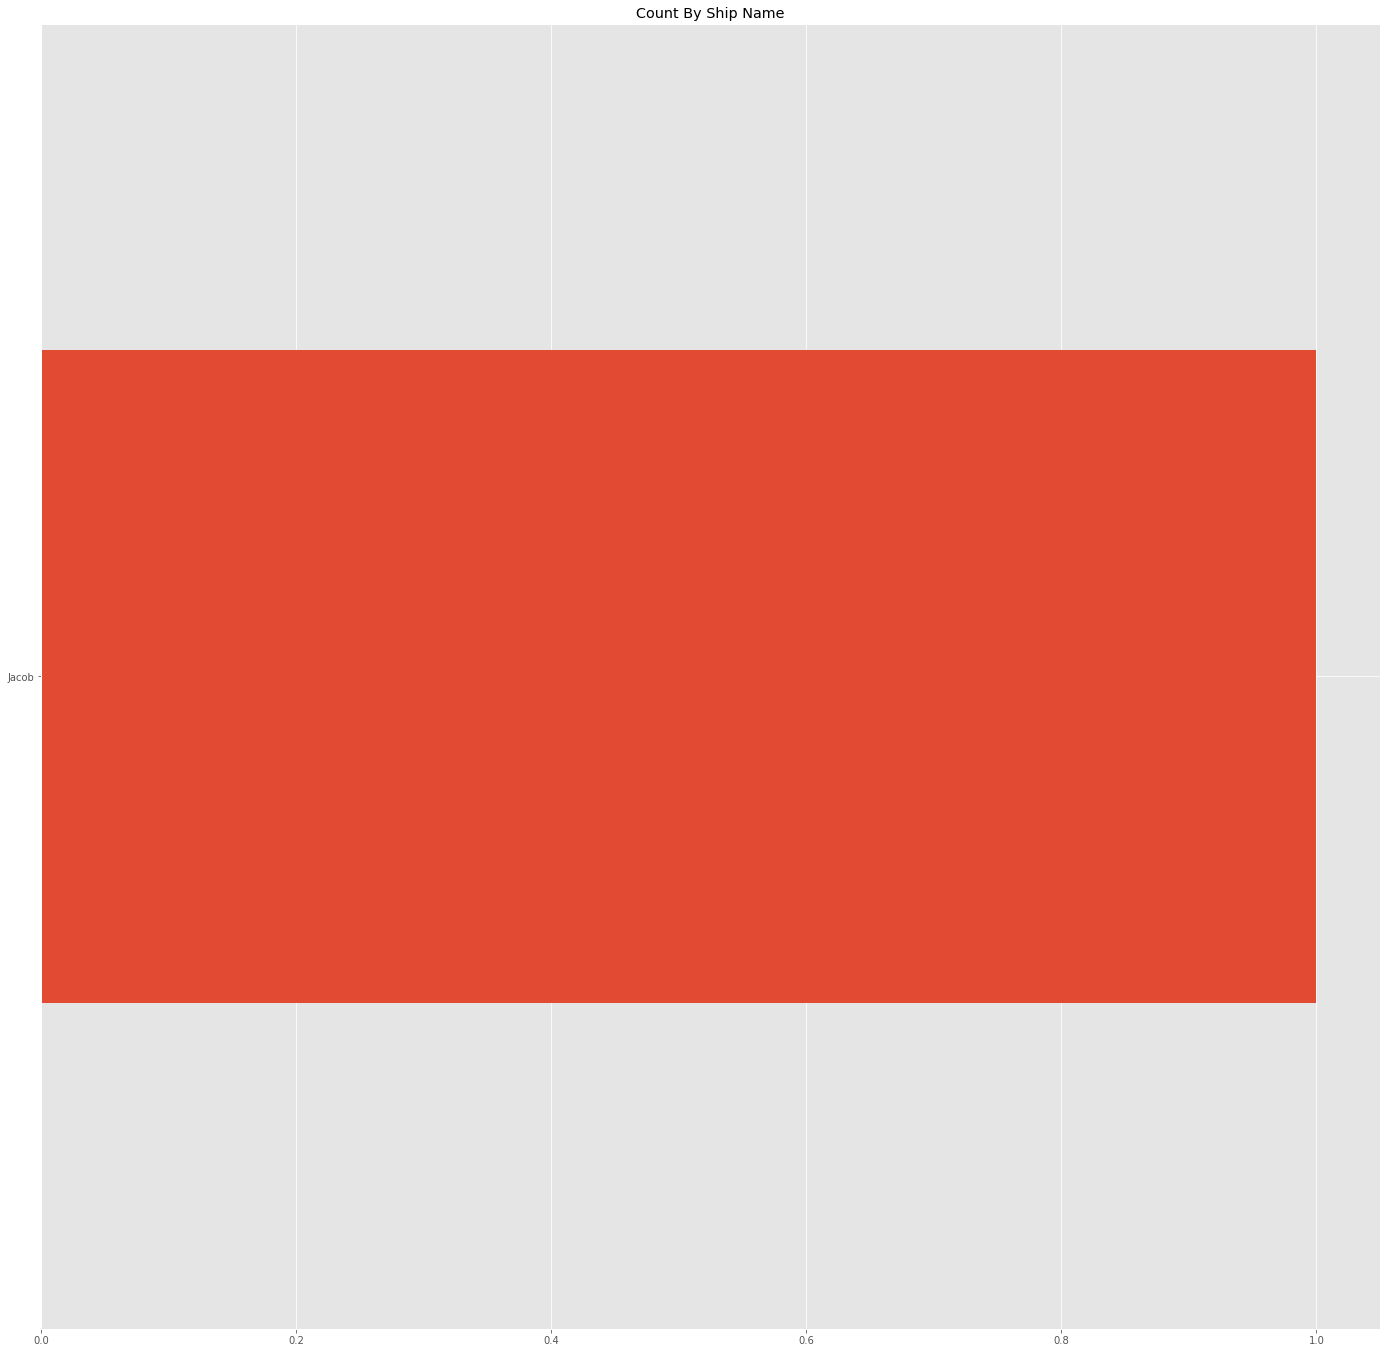

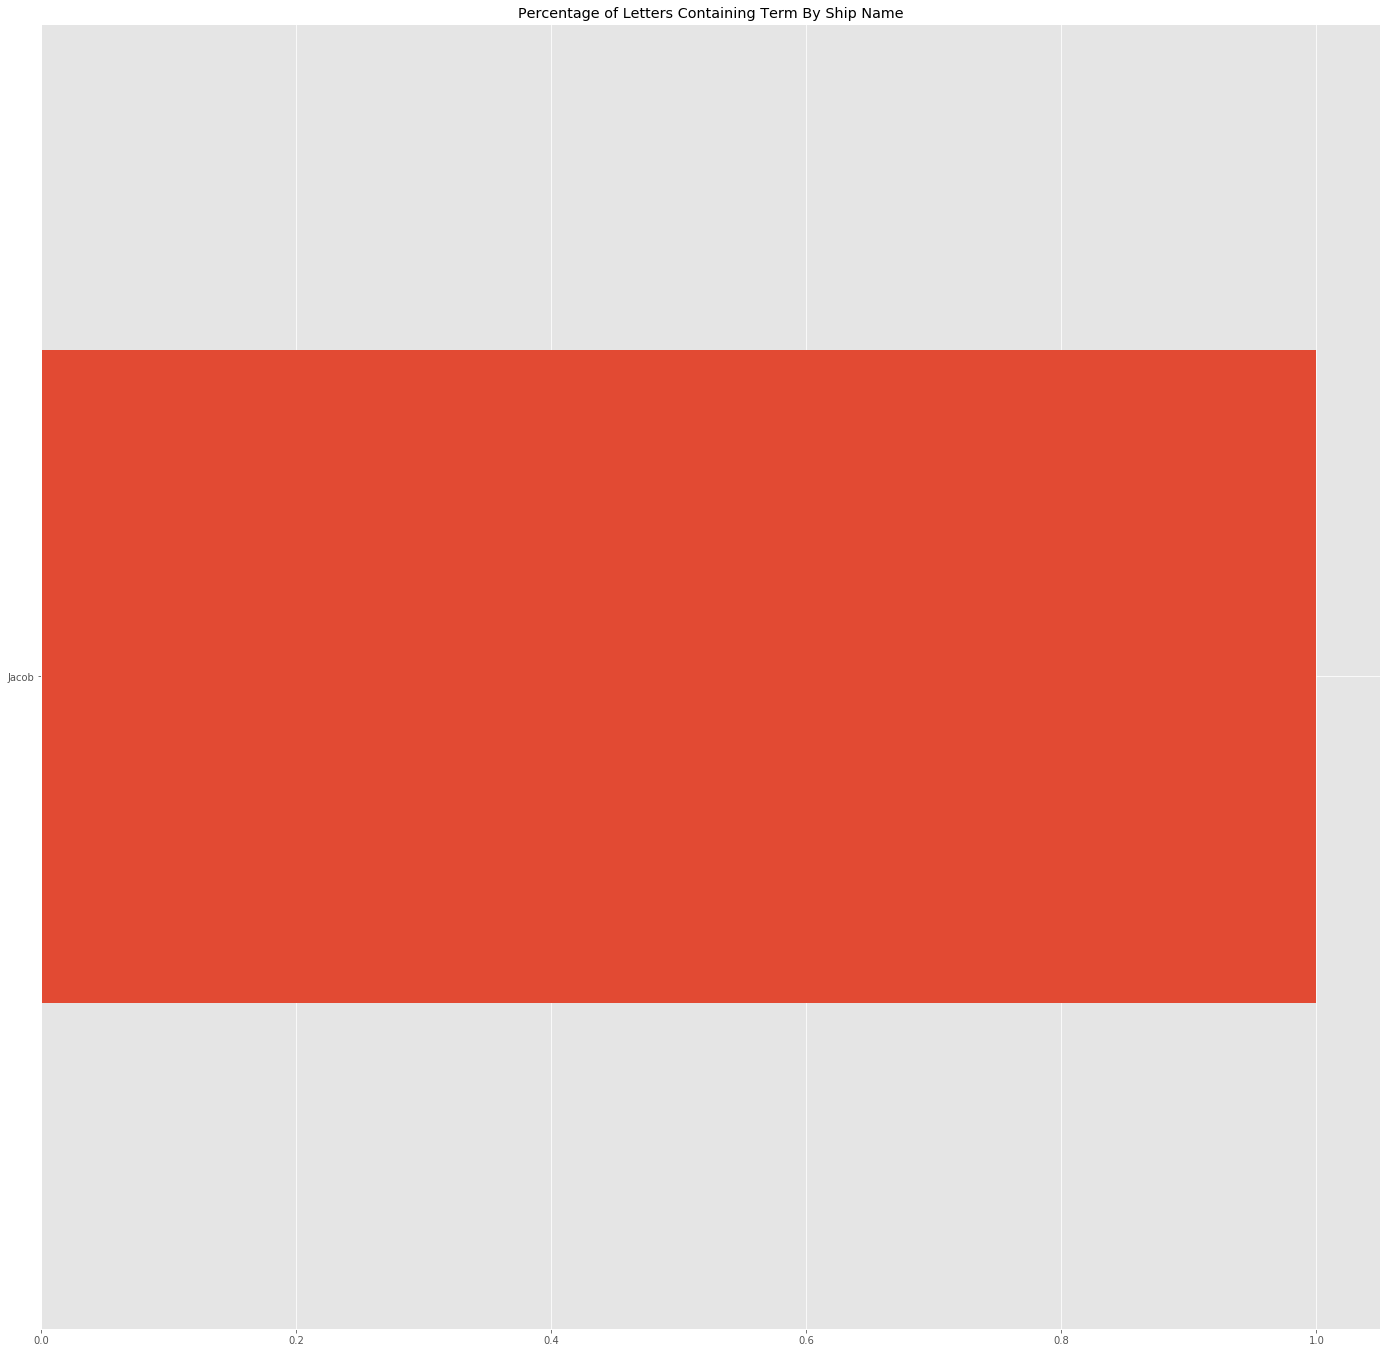

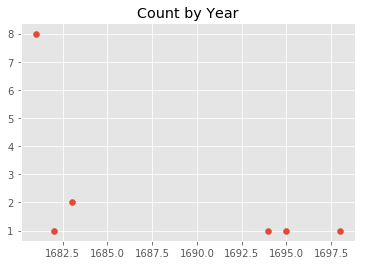

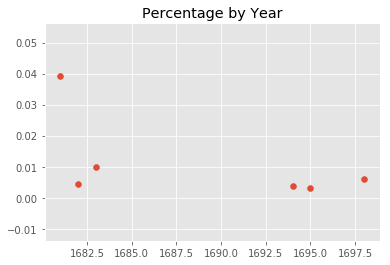

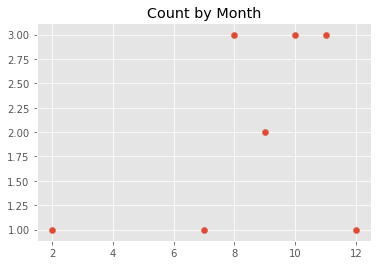

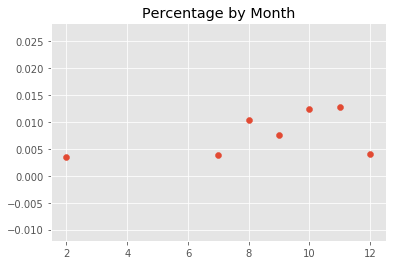

In [3]:
# Modify the terms within the brackets below to modify search. Terms need to be wrapped in parentheses and comma separated.
# The square brackets should be left unchanged.
terms = ['kettles']


# DO NOT CHANGE ANYTHING BELOW!!!
def return_terms_found(text, terms):
    for term in terms:
        if term in text.split(' '):
            return True
    
    return False

df['filtered'] = df['text_cleaned_dealiased'].apply(return_terms_found, args=(terms,))

df_subset = df[df['filtered'] == True]

print('Filtering for term:', terms, '({} total letters)'.format(len(df_subset)))

print('First 5 rows of filtered dataframe:')
display(df_subset.head())

print('UIDs of letters containing the term:')
print(df_subset['UID'].values)

for column in ['Place Sent From', 'Sender', 'Boat/Fort', 'Ship Name']:
    try:
        plt.figure(figsize=(24, 24))
        df_subset[column].value_counts().plot(kind='barh', title='Count By {}'.format(column))
    except:
        print('ERROR: All metadata for this column are null')
    try:
        plt.figure(figsize=(24, 24))
        (df_subset[column].value_counts() / df[column].value_counts()).sort_values().dropna().plot(kind='barh', title='Percentage of Letters Containing Term By {}'.format(column))
    except:
        print('ERROR: All metadata for this column are null')
    if column != 'Ship Name':
        try:
            plt.figure(figsize=(24, 24))
            (df_subset[df_subset['Boat/Fort'] == 'Fort'][column].value_counts() / df[df['Boat/Fort'] == 'Fort'][column].value_counts())\
                .sort_values()\
                .dropna()\
                .plot(kind='barh', title='Percentage of Letters Containing Term By {}, Forts'.format(column))
        except:
            print('ERROR: Filtering for Fort')

plt.figure()
plt.title('Count by Year')
plt.scatter(df_subset.groupby('Year').count()['UID'].index, df_subset.groupby('Year').count()['UID'])

plt.figure()
plt.title('Percentage by Year')
plt.scatter((df_subset.groupby('Year').count()['UID'] / df.groupby('Year').count()['UID']).dropna().index, (df_subset.groupby('Year').count()['UID'] / df.groupby('Year').count()['UID']).dropna())


plt.figure()
plt.title('Count by Month')
plt.scatter(df_subset.groupby('Month').count()['UID'].index, df_subset.groupby('Month').count()['UID'])

plt.figure()
plt.title('Percentage by Month')
plt.scatter((df_subset.groupby('Month').count()['UID'] / df.groupby('Month').count()['UID']).dropna().index, (df_subset.groupby('Month').count()['UID'] / df.groupby('Month').count()['UID']).dropna())